# Predicting Critical Temperature of Superconductors using GradientBoosting Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Importing the dataset

In [2]:
#read data from additional data file
df_formula = pd.read_csv("unique_m.csv") 
df_formula.head(10)

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4
5,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.5La1.5Cu1O4
6,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,11.0,Ba1La1Cu1O4
7,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,33.0,Sr0.1La1.9Cu1O4
8,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,36.0,Sr0.15La1.85Cu1O4
9,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,31.0,Sr0.2La1.8Cu1O4


In [3]:
df_formula.columns

Index(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al',
       'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn',
       'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb',
       'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In',
       'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta',
       'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At',
       'Rn', 'critical_temp', 'material'],
      dtype='object')

In [4]:
# data frame for Iron based superconductor 
df_Iron_based= df_formula[df_formula['Fe']>0]
df_Iron_based.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
73,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,30.0,Sr0.2La1.8Cu0.95Fe0.05O4
81,0.0,0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,51.0,Y1Ba2Cu2.85Fe0.15O7
82,0.0,0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,33.0,Y1Ba2Cu2.7Fe0.3O7
83,0.0,0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,82.0,Y1Ba2Cu2.97Fe0.03O7
84,0.0,0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,60.0,Y1Ba2Cu2.94Fe0.06O7


In [5]:
# summary statics on Iron based superconductors
df_Iron_based.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,2339.000000,2339.0,2339.00000,2339.0,2339.000000,2339.000000,2339.0,2339.000000,2339.000000,2339.0,...,2339.000000,2339.0,2339.000000,2339.000000,2339.000000,2339.000000,2339.0,2339.0,2339.0,2339.000000
mean,0.019757,0.0,0.01826,0.0,0.032493,0.015383,0.0,1.501182,0.027363,0.0,...,0.089038,0.0,0.004917,0.010898,0.002651,0.041428,0.0,0.0,0.0,26.899779
std,0.122642,0.0,0.13099,0.0,0.272437,0.142396,0.0,2.674028,0.111419,0.0,...,0.550609,0.0,0.064390,0.118710,0.041070,0.341345,0.0,0.0,0.0,21.433297
min,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.018000
25%,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,11.250000
50%,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,21.700000
75%,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,35.500000
max,1.000000,0.0,1.10000,0.0,6.000000,4.000000,0.0,16.634000,1.200000,0.0,...,5.800000,0.0,1.000000,2.000000,1.000000,4.000000,0.0,0.0,0.0,130.000000


In [6]:
#summaryy statistics of critical temperature for Iron baesd superconductor
df_Iron_based['critical_temp'].describe()

count    2339.000000
mean       26.899779
std        21.433297
min         0.018000
25%        11.250000
50%        21.700000
75%        35.500000
max       130.000000
Name: critical_temp, dtype: float64

In [7]:
dataset = pd.read_csv('train.csv')
dataset.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [8]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number_of_elements,21263.0,4.115224,1.439295,1.000000,3.000000,4.000000,5.000000,9.0000
mean_atomic_mass,21263.0,87.557631,29.676497,6.941000,72.458076,84.922750,100.404410,208.9804
wtd_mean_atomic_mass,21263.0,72.988310,33.490406,6.423452,52.143839,60.696571,86.103540,208.9804
gmean_atomic_mass,21263.0,71.290627,31.030272,5.320573,58.041225,66.361592,78.116681,208.9804
wtd_gmean_atomic_mass,21263.0,58.539916,36.651067,1.960849,35.248990,39.918385,73.113234,208.9804
...,...,...,...,...,...,...,...,...
range_Valence,21263.0,2.041010,1.242345,0.000000,1.000000,2.000000,3.000000,6.0000
wtd_range_Valence,21263.0,1.483007,0.978176,0.000000,0.921454,1.063077,1.918400,6.9922
std_Valence,21263.0,0.839342,0.484676,0.000000,0.451754,0.800000,1.200000,3.0000
wtd_std_Valence,21263.0,0.673987,0.455580,0.000000,0.306892,0.500000,1.020436,3.0000


In [9]:
dataset.duplicated().sum()

66

In [10]:
df= dataset.drop_duplicates()
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [11]:
df_total= pd.merge(df,df_formula,how='inner',on='critical_temp')

In [12]:
df_total.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.2La1.8Cu1O4
1,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Sr0.2La1.8Cu0.99Zn0.01O4
2,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,Bi2Sr2Ca0.5Lu0.5Cu2O8
3,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,Ba0.6K0.4Bi1O3
4,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,Ba0.7K0.75Bi1O


In [13]:
df_total['critical_temp'].describe()

count    713985.000000
mean         38.194428
std          32.197207
min           0.000210
25%          10.000000
50%          28.000000
75%          72.000000
max         185.000000
Name: critical_temp, dtype: float64

C:\Users\Samira\Anaconda3\envs\tensorflow.session\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='critical_temp', ylabel='Density'>

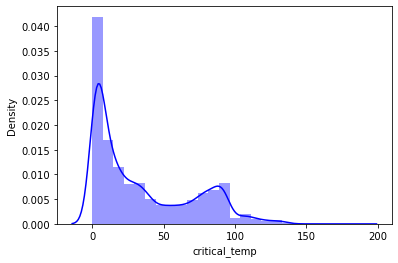

In [14]:
sns.distplot(df.critical_temp, bins=25, color='blue')

# https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/

C:\Users\Samira\Anaconda3\envs\tensorflow.session\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 2.92 and sigma = 1.29



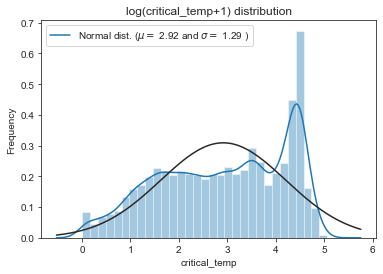

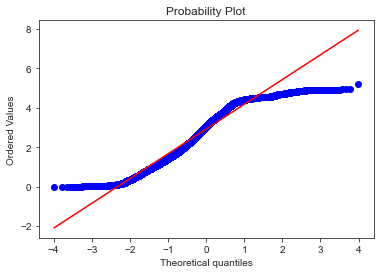

In [126]:
from scipy import stats
from scipy.stats import norm
sns.distplot(np.log1p(df['critical_temp']) , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.log1p(df['critical_temp']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('log(critical_temp+1) distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(np.log1p(df['critical_temp']), plot=plt)
plt.show();

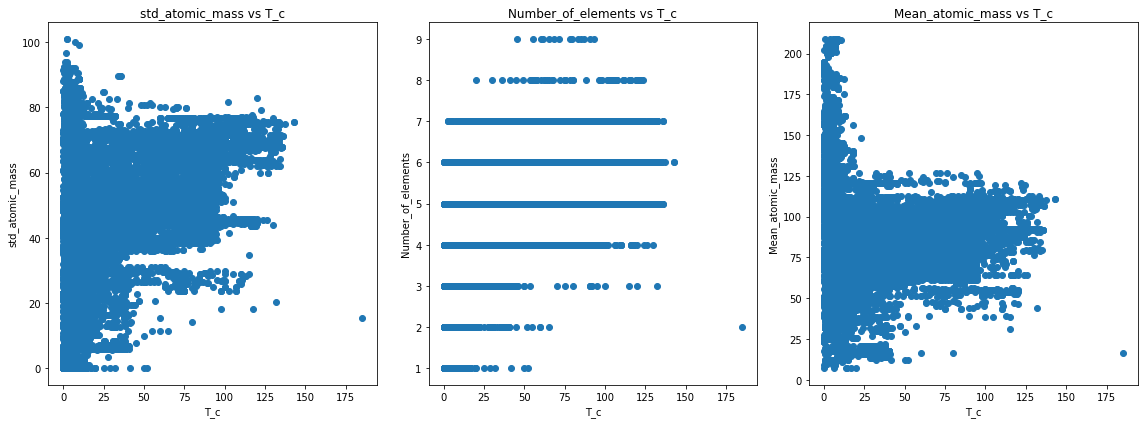

In [16]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df.critical_temp,df.std_atomic_mass,'o')
axes[0].set_ylabel("std_atomic_mass")
axes[0].set_xlabel("T_c")
axes[0].set_title("std_atomic_mass vs T_c")

axes[1].plot(df.critical_temp,df.number_of_elements,'o')
axes[1].set_title("Number_of_elements vs T_c")
axes[1].set_ylabel("Number_of_elements")
axes[1].set_xlabel("T_c")

axes[2].plot(df.critical_temp,df.mean_atomic_mass,'o')
axes[2].set_title("Mean_atomic_mass vs T_c");
axes[2].set_ylabel("Mean_atomic_mass")
axes[2].set_xlabel("T_c")
plt.tight_layout();

In [17]:
df_formula.columns

Index(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al',
       'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn',
       'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb',
       'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In',
       'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta',
       'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At',
       'Rn', 'critical_temp', 'material'],
      dtype='object')

In [18]:
# figure shows the mean superconducting critical temperature grouped by elements


<AxesSubplot:>

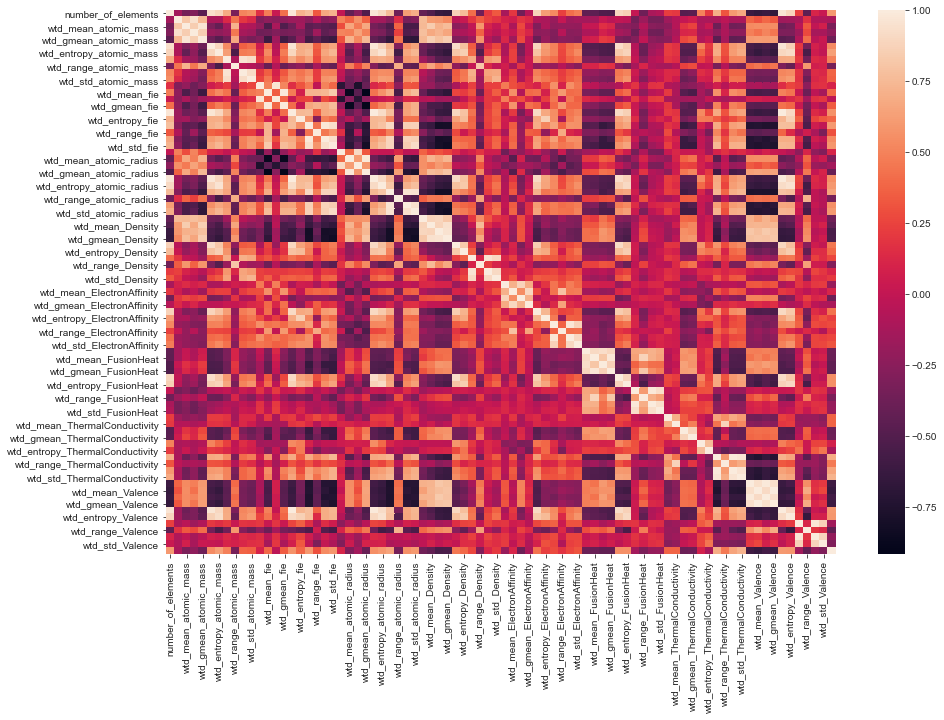

In [125]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 10)
sns.heatmap(df.corr(), ax=ax)

In [20]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)

[[ 4.         88.9444675  57.86269229 ...  1.08571429  0.4330127
   0.43705882]
 [ 5.         92.729214   58.51841614 ...  1.12857143  0.63245553
   0.46860627]
 [ 4.         88.9444675  57.88524186 ...  1.11428571  0.4330127
   0.44469664]
 ...
 [ 2.         99.66319    95.609104   ...  3.2         0.5
   0.4       ]
 [ 2.         99.66319    97.0956022  ...  2.21        0.5
   0.46249324]
 [ 3.         87.46833333 86.8585     ...  1.8         1.41421356
   1.5       ]]


## Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# Features Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the GradientBoostingRegressor model on the Training set

In [23]:
# check xgboost version
import xgboost
print(xgboost.__version__)

0.90


In [24]:
# create an xgboost regression model
from xgboost import XGBRegressor
help(XGBRegressor)

Help on class XGBRegressor in module xgboost.sklearn:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  Implementation of the scikit-learn API for XGBoost regression.
 |  
 |  Parameters
 |  ----------
 |  max_depth : int
 |      Maximum tree depth for base learners.
 |  learning_rate : float
 |      Boosting learning rate (xgb's "eta")
 |  n_estimators : int
 |      Number of trees to fit.
 |  verbosity : int
 |      The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |  silent : boolean
 |      Whether to print messages while running boosting. Deprecated. Use verbosity instead.
 |  objective : string or callable
 |      Specify the learning task and the corresponding learning objective or
 |      a custom objective function to be used (see note below).
 |  booster: string
 |      Specify which booster to use: gbtree, gblinear or dart.
 |  nthread : int
 |      Number of parallel threads used to run xgboost.  (Deprecated, please use ``n_jobs``)
 |  n_jobs :

# Evaluate XGBoost Models With Learning Curves
- [Early stop_XGBoost](https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/)
- We can retrieve the performance of the model on the evaluation dataset and plot it to get insight into how learning unfolded while training.

- We provide an array of X and y pairs to the eval_metric argument when fitting our XGBoost model. In addition to a test set, we can also provide the training dataset. This will provide a report on how well the model is performing on both training and test sets during training. 

## Predicting the Test set results

In [116]:
model = XGBRegressor(n_estimators=200, max_depth=8, learning_rate=0.1, objective='reg:linear', min_child_weight=5)
model.fit(X_train, y_train, eval_metric="error", verbose=True)

[12:17:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=8, min_child_weight=5, n_estimators=200)

In [117]:
y_pred = model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 5.03 10.8 ]
 [19.58 21.5 ]
 [ 6.29  5.27]
 ...
 [12.62 13.8 ]
 [ 3.05  0.96]
 [26.82 17.2 ]]


Text(0.5, 1.0, 'Critical Temperature__XGBoost_Model')

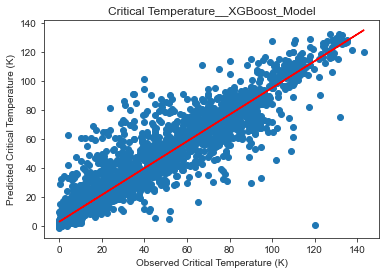

In [118]:
# plot the dataset and the model's line of best fit
# plot the dataset
plt.scatter(y_test, y_pred)
# plot the line of best fit
m, b = np.polyfit(y_test, y_pred, 1)
# m = slope, b=intercept
plt.plot(y_test, m*y_test + b,  color='r')
# show the plot
plt.xlabel('Observed Critical Temperature (K)')
plt.ylabel('Predicted Critical Temperature (K)')
plt.title('Critical Temperature__XGBoost_Model')

In [119]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean_squared_error(y_test, y_pred)
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

9.692080365014027

# [Feature Importance and Feature Selection With XGBoost in Python](https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/)

In [52]:
feat_import= model.feature_importances_
print(feat_import)

[3.81e-05 1.01e-04 3.70e-04 9.28e-04 5.95e-04 4.07e-04 3.94e-04 5.77e-04
 1.89e-03 4.22e-03 1.39e-03 4.13e-04 4.19e-04 6.09e-04 4.30e-04 6.86e-04
 5.63e-04 9.49e-04 1.15e-03 5.77e-04 4.20e-04 8.89e-04 2.96e-04 5.82e-04
 4.04e-04 7.09e-04 4.13e-04 1.69e-02 5.08e-04 1.40e-03 6.65e-04 4.51e-03
 4.30e-04 1.04e-02 5.67e-04 3.52e-03 8.30e-04 3.86e-04 6.89e-04 1.57e-02
 6.61e-04 1.42e-03 5.55e-04 3.70e-03 1.30e-03 8.98e-04 5.07e-04 1.35e-03
 1.32e-03 1.03e-03 3.38e-03 9.41e-04 4.11e-04 7.09e-04 3.70e-04 1.41e-03
 1.12e-03 5.28e-04 4.81e-04 1.11e-03 6.34e-04 1.77e-03 1.51e-03 1.54e-03
 4.09e-02 7.50e-03 1.92e-03 8.21e-01 7.84e-04 7.18e-04 1.14e-03 5.31e-04
 3.38e-03 8.64e-04 6.57e-03 1.11e-03 6.55e-04 2.20e-03 2.51e-03 8.69e-04
 2.08e-03]


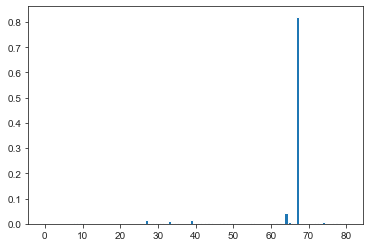

<Figure size 5200x1800 with 0 Axes>

In [53]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.figure(figsize=(52,18),dpi=100)
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

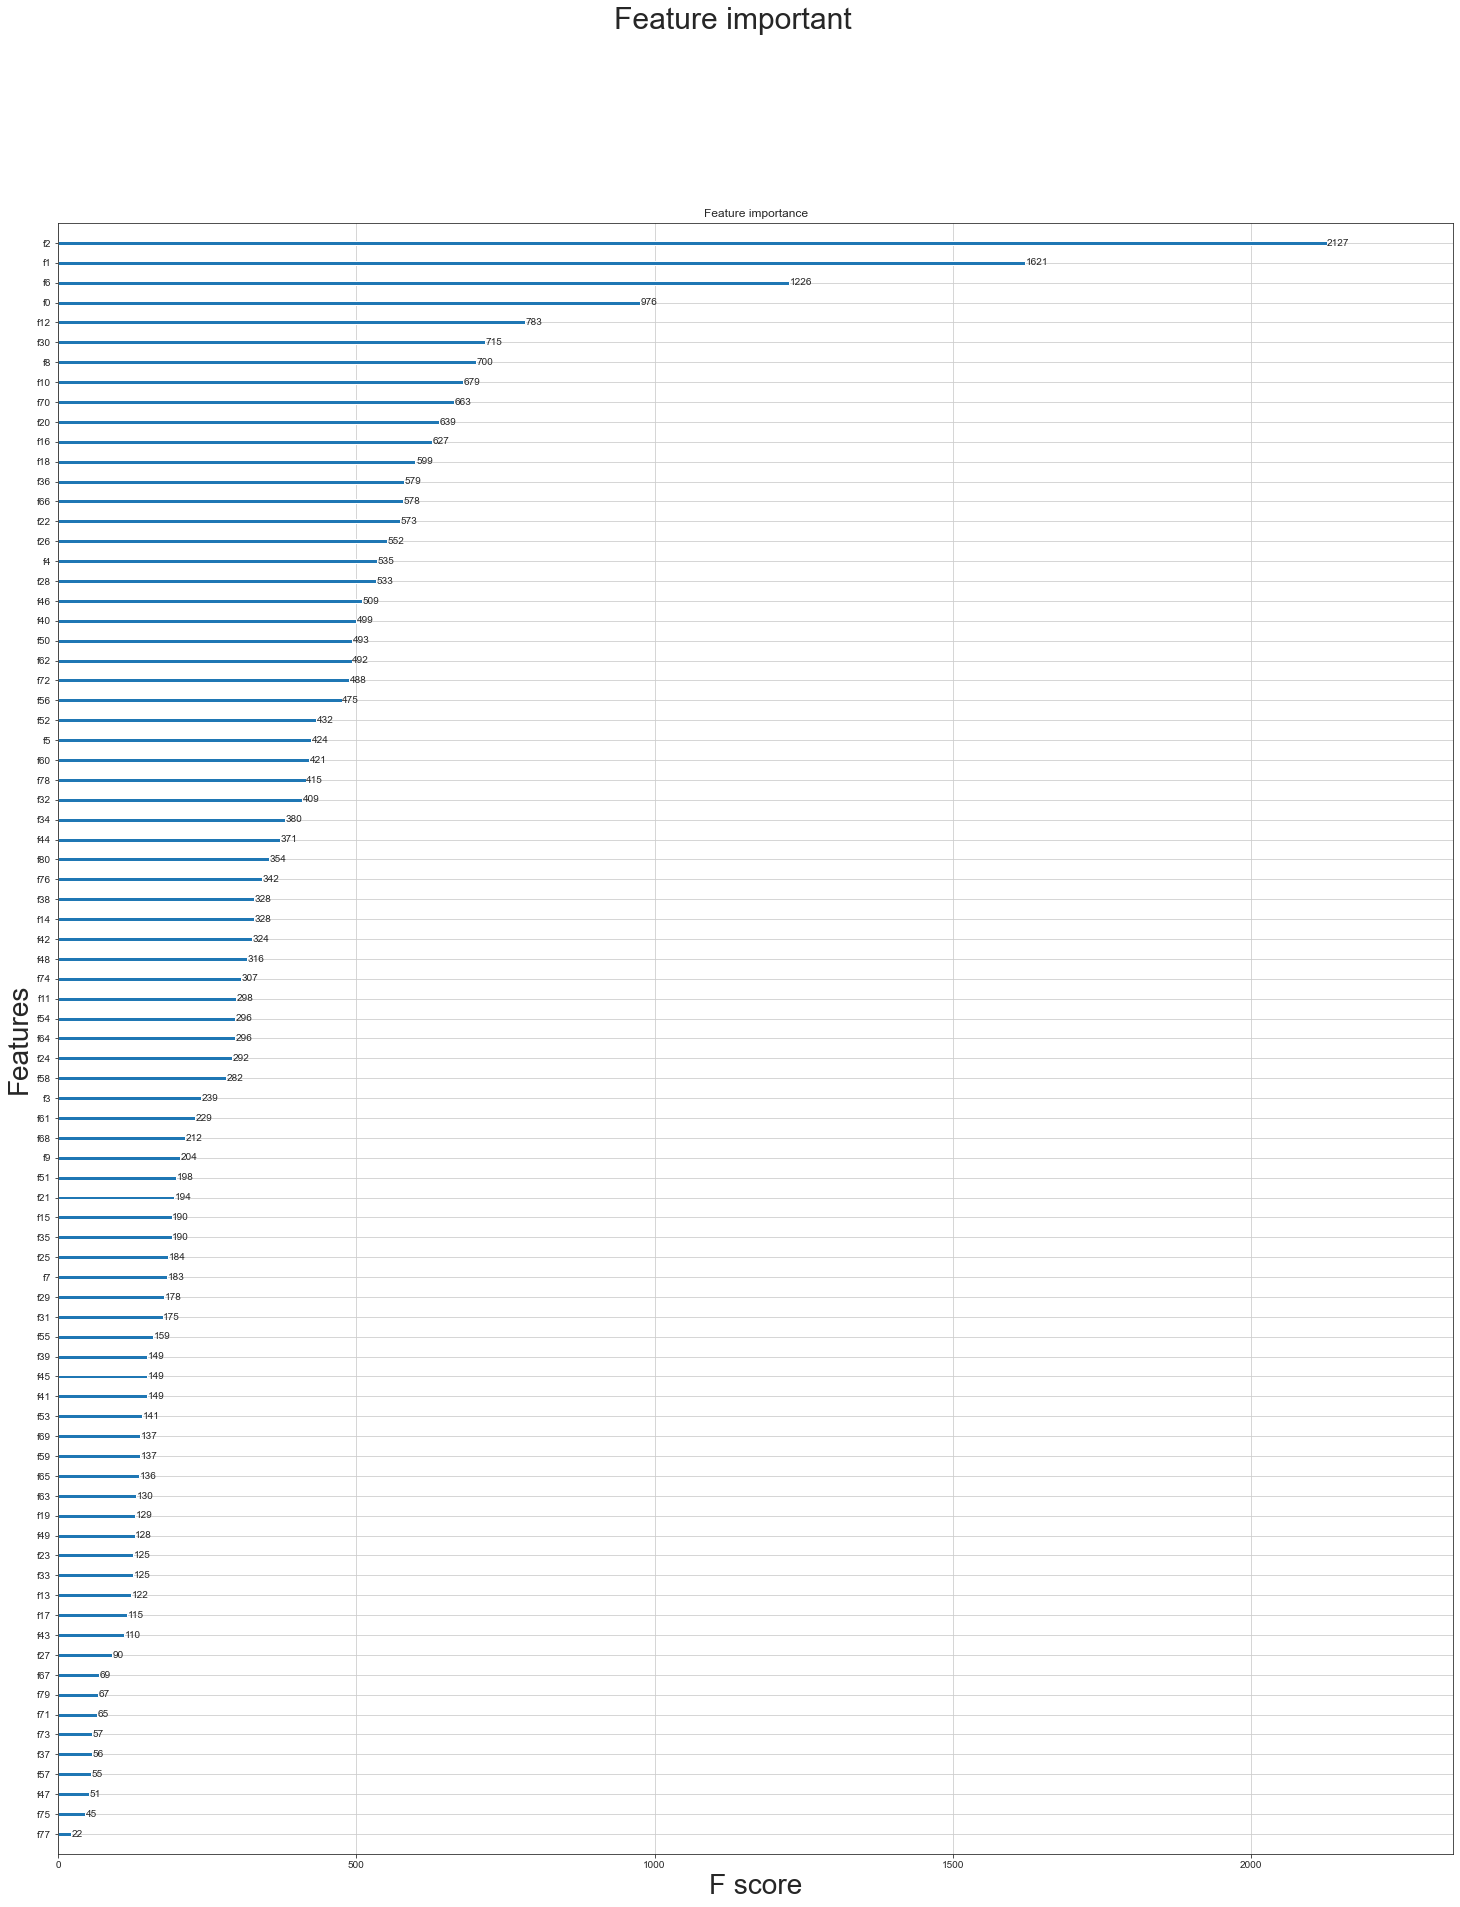

In [54]:
from xgboost import plot_importance
sns.set_style('ticks')
fig, ax = plt.subplots()

fig.suptitle('Feature important', fontsize=30)
plt.xlabel('Features', fontsize=28)
plt.ylabel('F score', fontsize=28)
fig.set_size_inches(25, 30)
plot_importance(model, ax=ax)

# Features important
- We can see that features are automatically named according to their index in the input array (X) from F0 to F81.
- Manually mapping these indices to names in the problem description, we can see that the plotshows F2 (mean_atomic_mass) has the highest importance and F77 (range_atomic_radius) has the lowest importance

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

n_estimators = [150, 250]
max_depth = [8, 6]
learning_rate= [0.1, 0.3]

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate= learning_rate)
model = XGBRegressor()
#model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# define model evaluation method
eval_set = [(X_train, y_train), (X_test, y_test)]
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, verbose=1)
grid_result = grid_search.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

Fitting 30 folds for each of 8 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 41.7min finished


[13:07:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-error:-33.4037	validation_1-error:-33.5101
[1]	validation_0-error:-33.4037	validation_1-error:-33.5099
[2]	validation_0-error:-33.4036	validation_1-error:-33.5099
[3]	validation_0-error:-33.4036	validation_1-error:-33.5099
[4]	validation_0-error:-33.403	validation_1-error:-33.509
[5]	validation_0-error:-33.4019	validation_1-error:-33.5088
[6]	validation_0-error:-33.4019	validation_1-error:-33.5088
[7]	validation_0-error:-33.4019	validation_1-error:-33.509
[8]	validation_0-error:-33.4032	validation_1-error:-33.5095
[9]	validation_0-error:-33.4034	validation_1-error:-33.5093
[10]	validation_0-error:-33.4032	validation_1-error:-33.509
[11]	validation_0-error:-33.402	validation_1-error:-33.5088
[12]	validation_0-error:-33.4032	validation_1-error:-33.509
[13]	validation_0-error:-33.4028	validation_1-error:-33.5083
[14]	validation_0-error:-33.4026	validation_1-

[133]	validation_0-error:-33.4031	validation_1-error:-33.5088
[134]	validation_0-error:-33.4031	validation_1-error:-33.5088
[135]	validation_0-error:-33.4031	validation_1-error:-33.5088
[136]	validation_0-error:-33.4031	validation_1-error:-33.5088
[137]	validation_0-error:-33.4031	validation_1-error:-33.5088
[138]	validation_0-error:-33.4033	validation_1-error:-33.5086
[139]	validation_0-error:-33.4033	validation_1-error:-33.5086
[140]	validation_0-error:-33.4035	validation_1-error:-33.5086
[141]	validation_0-error:-33.4035	validation_1-error:-33.5086
[142]	validation_0-error:-33.4036	validation_1-error:-33.5088
[143]	validation_0-error:-33.4035	validation_1-error:-33.5089
[144]	validation_0-error:-33.4035	validation_1-error:-33.5089
[145]	validation_0-error:-33.4034	validation_1-error:-33.5089
[146]	validation_0-error:-33.4034	validation_1-error:-33.5089
[147]	validation_0-error:-33.4034	validation_1-error:-33.5089
[148]	validation_0-error:-33.4034	validation_1-error:-33.5089
[149]	va

In [121]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 250}

Best: -5.331838 using {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 250}
-5.455733 (0.180233) with: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150}
-5.331838 (0.183769) with: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 250}
-6.033406 (0.192054) with: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}
-5.739163 (0.186425) with: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 250}
-5.442267 (0.214753) with: {'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 150}
-5.411741 (0.214425) with: {'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 250}
-5.673527 (0.174568) with: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 150}
-5.556715 (0.180747) with: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 250}


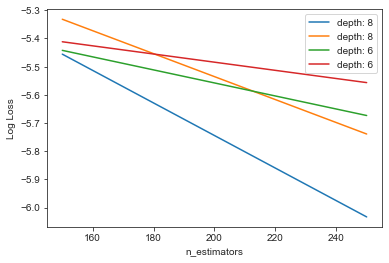

In [122]:
# summarize results
import numpy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators), len(learning_rate))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

In [123]:
y_pred = grid_result.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 4.64 10.8 ]
 [20.44 21.5 ]
 [ 6.53  5.27]
 ...
 [13.06 13.8 ]
 [ 3.09  0.96]
 [27.69 17.2 ]]


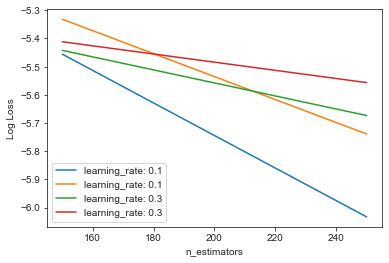

In [124]:
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('learning_rate_vs_max_depth.png')